In [1]:
# Importing dependecies
import pandas as pd
import json
import requests
import prettytable
from config import api_key
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Dictionary of series ID 
category_dict = {
    'CXUFOODAWAYLB1101M': 'Food Away',
    'CXUAPPARELLB1101M': 'Apparel',
    'CXUENTRTAINLB1101M': 'Entertainment',
    'CXUCASHCONTLB1101M': 'Cash Contribution',
    'CXUALCBEVGLB1101M': 'Alcohol Beverages',
    'CXUEDUCATNLB1101M': 'Education',
    'CXUPERSCARELB1101M': 'Personal Care',
    'CXUTOBACCOLB1101M': 'Tobacco'
}

disposable_dict = {
     'CXUFOODHOMELB0401M': 'FOOD HOME',
     'CXUHEALTHLB0401M': 'HEALTH',
     'CXUHOUSINGLB0401M': 'HOUSING',
     'CXUTRANSLB0401M': 'TRANSPORT', 
}

# List of series IDs
category_list = list(category_dict.keys())

In [3]:
# Load the json response for the API queries
def json_df(dictionary):
    headers = {'Content-type': 'application/json'}
    data = json.dumps({"seriesid": list(dictionary.keys()),"startyear":"2005", "endyear":"2018","registrationkey":api_key})
    p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
    json_data = json.loads(p.text)

    try:
        df = pd.DataFrame()

        # Loops through the json response to create a DataFrame
        for series in json_data['Results']['series']:
            # Create an initial DataFrame with column of Series IDs and dictionary of data
            df_initial = pd.DataFrame(series)
            series_col = df_initial['seriesID'][0]

            # Loops through the length of the initial DF to split up its second column
            for i in range(0, len(df_initial) - 1):
                df_row = pd.DataFrame(df_initial['data'][i])
                df_row['seriesID'] = series_col
                if 'code' not in str(df_row['footnotes']): 
                    df_row['footnotes'] = ''
                else:
                    df_row['footnotes'] = str(df_row['footnotes']).split("'code': '",1)[1][:1]
                df = df.append(df_row, ignore_index=True)

    except:
        json_data['status'] == 'REQUEST_NOT_PROCESSED'
        print('BLS API has given the following Response:', json_data['status'])
        print('Reason:', json_data['message'])
    return df

In [4]:
def get_total(df):
    # Initialize variables
    total = []
    dict_list = []
    i = 0
    
    # Convert the value column to float - a numeric data type will be needed to visualize the data
    df['value'] = df['value'].astype(float)
    
    series_set = set(df["seriesID"])
    for e in series_set:
        dict_list.append(e)
    
    dict_list = sorted(dict_list)
    
    # Loop through series list to create a list of the totals of each spending category
    for key in dict_list:
        # Append a value to a list to record the spending for each category
        total.append(int(df.groupby('seriesID')['value'].sum()[key]))

        # Counter
        i = i + 1
    return total

In [5]:
df_category = json_df(category_dict)
df_disposable = json_df(disposable_dict)

In [6]:
total = get_total(df_category)
total2 = get_total(df_disposable)

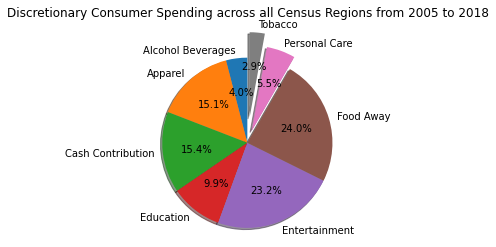

In [7]:
#DISCRETIONARY PIE CHART

# Labels of the categories
labels = sorted(list(category_dict.values()))

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0, 0, 0, .15, .3)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Discretionary Consumer Spending across all Census Regions from 2005 to 2018')
plt.xlabel('')
plt.ylabel('')
plt.show()

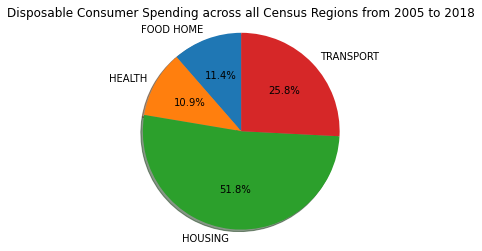

In [8]:
#DISPOSABLE PIE CHART

# Labels of the categories
labels = sorted(list(disposable_dict.values()))

# Explode the two smallest expenses (i.e Tobacco and Personal Care)
explode = (0, 0, 0, 0)  

# Initialize figure and axis
fig1, ax1 = plt.subplots()

# Create pie chart of the breakdown of discretionary spending
ax1.pie(total2, explode=explode, labels=labels, autopct='%1.1f%%',
         shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Disposable Consumer Spending across all Census Regions from 2005 to 2018')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [9]:
df_category = df_category.sort_values(['seriesID','year'], ascending = True).reset_index(drop=True)
df_category

,year,period,periodName,latest,value,footnotes,seriesID
0,2006,A01,Annual,NaN,497.0,,CXUALCBEVGLB1101M
1,2007,A01,Annual,NaN,457.0,,CXUALCBEVGLB1101M
2,2008,A01,Annual,NaN,444.0,,CXUALCBEVGLB1101M
3,2009,A01,Annual,NaN,435.0,,CXUALCBEVGLB1101M
4,2010,A01,Annual,NaN,412.0,,CXUALCBEVGLB1101M
...,...,...,...,...,...,...,...
99,2014,A01,Annual,NaN,319.0,,CXUTOBACCOLB1101M
100,2015,A01,Annual,NaN,349.0,,CXUTOBACCOLB1101M
101,2016,A01,Annual,NaN,337.0,,CXUTOBACCOLB1101M
102,2017,A01,Annual,NaN,332.0,,CXUTOBACCOLB1101M


In [10]:
# Get percent change over the years, grouped by series ID
df_category['pct_decimal'] = df_category.groupby(['seriesID'])['value'].pct_change()
df_category['percent_change'] = df_category['pct_decimal'].multiply(100)
df_category

,year,period,periodName,latest,value,footnotes,seriesID,pct_decimal,percent_change
0,2006,A01,Annual,NaN,497.0,,CXUALCBEVGLB1101M,NaN,NaN
1,2007,A01,Annual,NaN,457.0,,CXUALCBEVGLB1101M,-0.080483,-8.048290
2,2008,A01,Annual,NaN,444.0,,CXUALCBEVGLB1101M,-0.028446,-2.844639
3,2009,A01,Annual,NaN,435.0,,CXUALCBEVGLB1101M,-0.020270,-2.027027
4,2010,A01,Annual,NaN,412.0,,CXUALCBEVGLB1101M,-0.052874,-5.287356
...,...,...,...,...,...,...,...,...,...
99,2014,A01,Annual,NaN,319.0,,CXUTOBACCOLB1101M,-0.033333,-3.333333
100,2015,A01,Annual,NaN,349.0,,CXUTOBACCOLB1101M,0.094044,9.404389
101,2016,A01,Annual,NaN,337.0,,CXUTOBACCOLB1101M,-0.034384,-3.438395
102,2017,A01,Annual,NaN,332.0,,CXUTOBACCOLB1101M,-0.014837,-1.483680


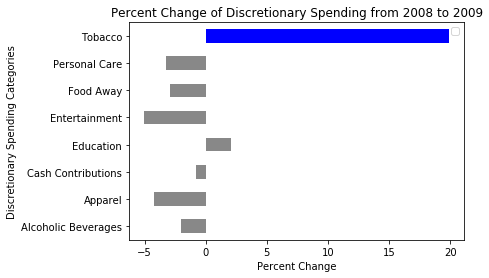

In [46]:
# Example python program to plot a horizontal bar chart
percent_chg_2009 = df_category.loc[df_category.year == '2009'][['seriesID','percent_change']]

dataFrame  = pd.DataFrame(data = percent_chg_2009)
colors = ["#888888","#888888","#888888","#888888","#888888","#888888","#888888","blue"]
dataFrame.plot.barh(x='seriesID', 
                    y='percent_change', 
                    title="Percent Change of Discretionary Spending from 2008 to 2009",
                   color=colors)

plt.yticks(np.arange(8), ("Alcoholic Beverages", 
                          "Apparel", 
                          "Cash Contributions", 
                          "Education", 
                          "Entertainment", 
                          "Food Away", 
                          "Personal Care", 
                          "Tobacco"))
plt.xlabel('Percent Change')
plt.ylabel('Discretionary Spending Categories')
plt.legend('')
plt.show(block=True)

In [47]:
############################# RUN THIS BLOCK ONLY ONCE #######################################
############################# RUN THIS BLOCK ONLY ONCE #######################################
############################# RUN THIS BLOCK ONLY ONCE #######################################

age25_dict = {
    
#AGE UNDER 25 LB0402M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0402M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0402M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0402M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0402M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0402M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0402M': 'Edu_AllRegions',
    'CXUPERSCARELB0402M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0402M': 'Tobacco_AllRegions',
}

df_age25 = json_df(age25_dict)
#df_age25

#########################################

age2534_dict = {

#Age 25-34 LB0403M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0403M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0403M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0403M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0403M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0403M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0403M': 'Edu_AllRegions',
    'CXUPERSCARELB0403M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0403M': 'Tobacco_AllRegions',  
}

df_age2534 = json_df(age2534_dict)
#df_age2534

#########################################

age3544_dict = {
    
#Age 35-44 LB0404M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0404M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0404M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0404M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0404M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0404M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0404M': 'Edu_AllRegions',
    'CXUPERSCARELB0404M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0404M': 'Tobacco_AllRegions',
}

df_age3544 = json_df(age3544_dict)
#df_age3544

#########################################

age4554_dict = {
    
#Age 45-54 LB0405M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0405M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0405M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0405M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0405M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0405M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0405M': 'Edu_AllRegions',
    'CXUPERSCARELB0405M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0405M': 'Tobacco_AllRegions',
}

df_age4554 = json_df(age4554_dict)
#df_age4554

#########################################

age5564_dict = {
    
#Age 55-64 LB0406M
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0406M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0406M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0406M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0406M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0406M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0406M': 'Edu_AllRegions',
    'CXUPERSCARELB0406M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0406MM': 'Tobacco_AllRegions',
}

df_age5564 = json_df(age5564_dict)
#df_age5564

#########################################

age65_dict = {
    
#Age Over 65 LB0407
    #STUFF FOR DISCRECTIONARY (FREELY SPENT)
    'CXUFOODAWAYLB0407M': 'FoodAway_AllRegions',
    'CXUAPPARELLB0407M': 'Apparel_AllRegions',
    'CXUENTRTAINLB0407M': 'Entertainment_AllRegions',
    'CXUCASHCONTLB0407M': 'CashCont_AllRegions',
    'CXUALCBEVGLB0407M': 'Alcohol_AllRegions',
    'CXUEDUCATNLB0407M': 'Edu_AllRegions',
    'CXUPERSCARELB0407M': 'PersonalCare_AllRegions',
    'CXUTOBACCOLB0407M': 'Tobacco_AllRegions',
}

df_age65 = json_df(age65_dict)
#df_age65

############################# RUN THIS BLOCK ONLY ONCE #######################################
############################# RUN THIS BLOCK ONLY ONCE #######################################
############################# RUN THIS BLOCK ONLY ONCE #######################################

BLS API has given the following Response: REQUEST_SUCCEEDED
Reason: ['Series does not exist for Series CXUTOBACCOLB0406MM']


In [48]:
#Set list for each Age Group to store totals for each category (alphabetized)

#Grab Values for Age Groups
AgeUnder25 = get_total(df_age25)
Age25to34 = get_total(df_age2534)
Age35to44 = get_total(df_age3544)
Age45to54 = get_total(df_age4554)
Age55to64 = get_total(df_age5564)
Age64plus = get_total(df_age65)
#No data for Tobacco for age groups 55 to 64

#AGE GROUP DF
name=['Under 25', 'Age 25-34', 'Age 35-44', 'Age 45-54', 'Age 55-64', "Age 65+"]
age_df = pd.DataFrame(data=[AgeUnder25, Age25to34, Age35to44, Age45to54, Age55to64, Age64plus],
                      columns=['Alcohol', 'Apparel', 'CashCont', 'Education', 'Entertainment', 'FoodAway',
                               'PersCare', 'Tobacco'])
age_df["Age Group"] = name
age_df.set_index("Age Group", drop=True, inplace=True)
age_df

,Alcohol,Apparel,CashCont,Education,Entertainment,FoodAway,PersCare,Tobacco
Age Group,,,,,,,,
Under 25,4654,17669,5793,27749,17727,26746,4836,3413.0
Age 25-34,6999,25780,13199,12545,31887,38273,7426,4325.0
Age 35-44,6952,29915,20530,13129,43257,45920,9749,4745.0
Age 45-54,6982,28108,27481,29278,42955,44716,9961,5724.0
Age 55-64,6624,22071,29545,14275,38840,35997,8759,NaN
Age 65+,4356,13898,31218,3541,28299,25184,7430,2579.0


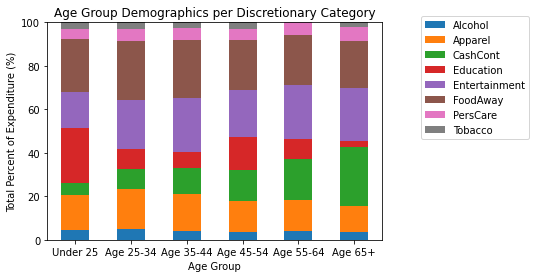

In [49]:
#AGE GROUP BAR CHART

# Compute the percentage 
age_df = age_df.div(age_df.sum(axis=1), axis=0) * 100

#Plot a stacked barchart
ax = age_df.plot.bar(stacked=True)

# Place the legend
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xticks(rotation=0)
plt.ylim(0, 100) #CHANGE 100 TO 200000 FOR Y lABEL: VALUE ($)
plt.title('Age Group Demographics per Discretionary Category')
plt.xlabel('Age Group')
plt.ylabel('Total Percent of Expenditure (%)')
plt.show()